In [101]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [102]:
df_train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [103]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
df_train.shape

(42000, 785)

In [105]:
from sklearn.model_selection import train_test_split

y = df_train['label'].to_numpy()
X = df_train.drop('label', axis=1).to_numpy()
print(f'Shape of X - {X.shape} and y - {y.shape}')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
print(f'Shape of X_train - {X_train.shape} and y_train - {y_train.shape}')
print(f'Shape of X_test - {X_test.shape} and y_test - {y_test.shape}')
    

    

Shape of X - (42000, 784) and y - (42000,)
Shape of X_train - (33600, 784) and y_train - (33600,)
Shape of X_test - (8400, 784) and y_test - (8400,)


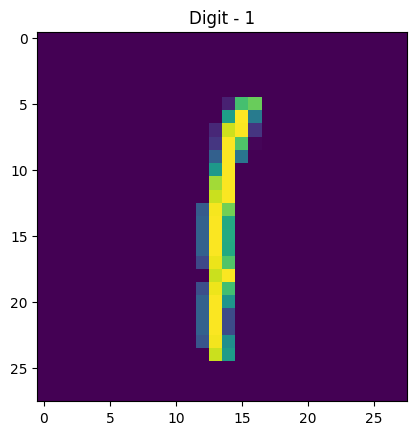

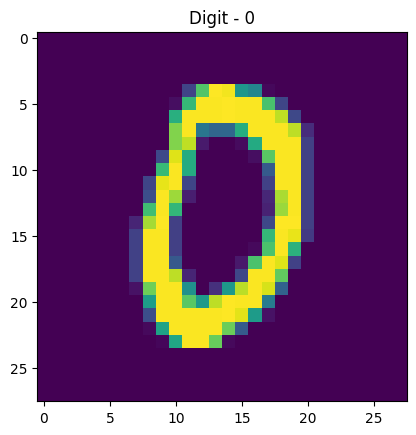

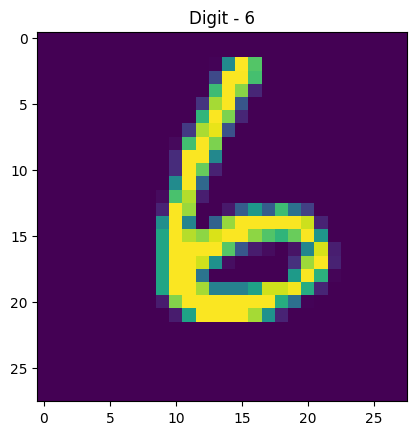

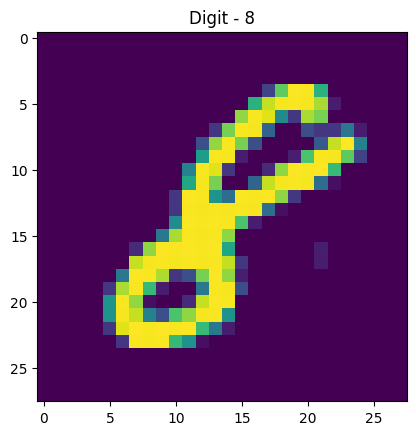

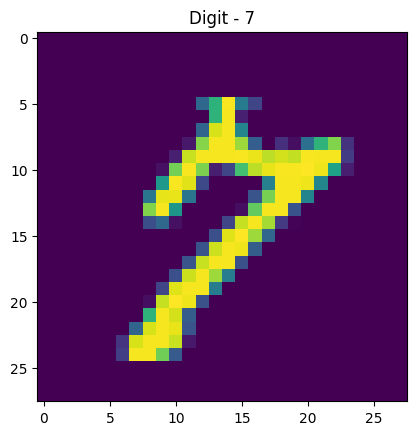

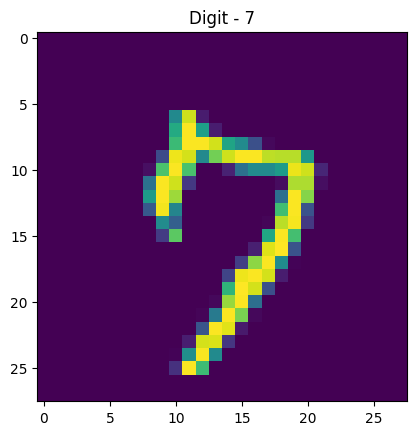

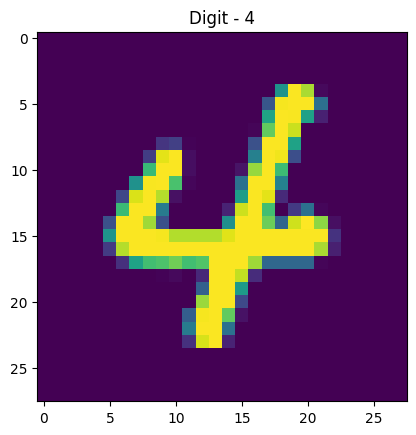

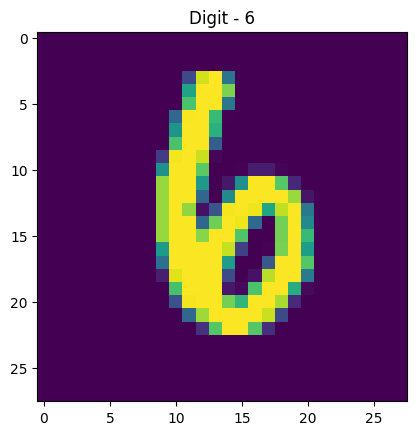

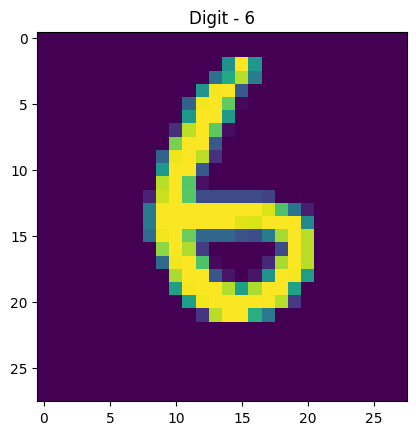

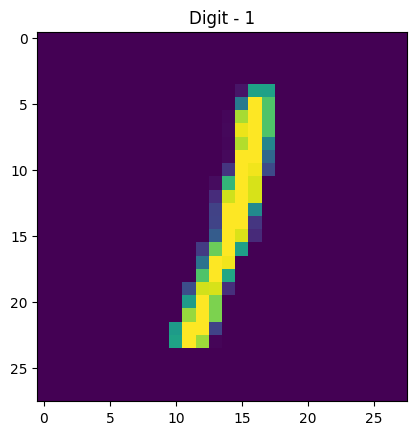

In [106]:
import matplotlib.pyplot as plt

def show_smaples(X, y):
    samples = np.random.randint(0, len(X), 10)
    for sample in samples:
        plt.imshow(X[sample].reshape(-1, 28))
        plt.title(f'Digit - {y_train[sample]}')
        plt.show()

show_smaples(X_train, y_train)

In [107]:
X_train.max(), X_train.min()

(255, 0)

In [108]:
def normalize_data(X):
    return X / 255.

X_train_transformed = normalize_data(X_train)

In [109]:
X_train_transformed.shape

(33600, 784)

In [110]:
import tensorflow as tf

In [111]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(16, 2, activation='relu', input_shape=(28, 28)),
    tf.keras.layers.MaxPooling1D(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv1D(32, 2, activation='relu', input_shape=(28, 28)),
    tf.keras.layers.MaxPooling1D(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [112]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_22 (Conv1D)              │ (None, 27, 16)         │           912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_22 (MaxPooling1D) │ (None, 13, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 13, 16)         │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_23 (Conv1D)              │ (None, 12, 32)         │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_23 (MaxPooling1D) │ (None, 6, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 6, 32)          │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,154 (109.98 KB)

 Trainable params: 28,058 (109.60 KB)

 Non-trainable params: 96 (384.00 B)

In [113]:
history = model.fit(
    X_train_transformed.reshape(-1, 28, 28),
    y_train,
    epochs=25,
    batch_size=32,
    validation_data=(normalize_data(X_test).reshape(-1, 28, 28), y_test)
)

Epoch 1/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6902 - loss: 0.9729 - val_accuracy: 0.9435 - val_loss: 0.1887
Epoch 2/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9055 - loss: 0.2964 - val_accuracy: 0.9617 - val_loss: 0.1202
Epoch 3/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9286 - loss: 0.2280 - val_accuracy: 0.9650 - val_loss: 0.1057
Epoch 4/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9370 - loss: 0.1953 - val_accuracy: 0.9693 - val_loss: 0.0935
Epoch 5/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9439 - loss: 0.1784 - val_accuracy: 0.9719 - val_loss: 0.0860
Epoch 6/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9506 - loss: 0.1584 - val_accuracy: 0.9721 - val_loss: 0.0840
Epoch 7/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9504 - loss: 0.1536 - val_accuracy: 0.9752 - val_loss: 0.0752
Epoch 8/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9548 - loss: 0.1446 - 

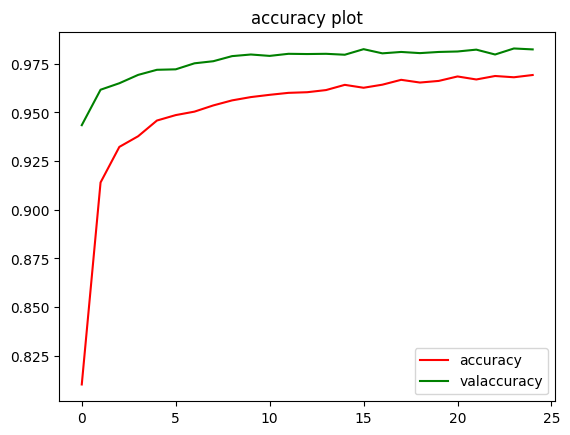

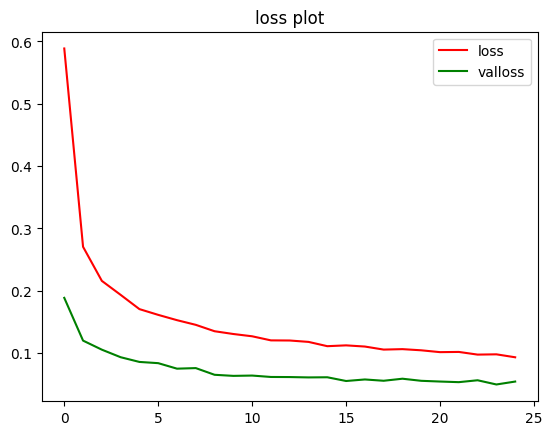

In [114]:
def history_plot(history, name):
    plt.plot(history.history[name], c='red', label=name)
    plt.plot(history.history['val_' + name], c='green', label=('val' + name))
    plt.legend()
    plt.title(name + ' plot')
    plt.show()

history_plot(history, 'accuracy')
history_plot(history, 'loss')

In [115]:
test_pred = model.predict(normalize_data(X_test[:5]).reshape(-1, 28, 28))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


In [116]:
pred = np.argmax(test_pred, axis=1)

In [117]:
pred

array([8, 1, 9, 9, 8])

In [118]:
test_pred

array([[1.0445523e-06, 6.0242000e-06, 7.8756835e-05, 3.6091583e-06,
        2.7700801e-07, 2.0615575e-08, 3.2753584e-07, 1.8732156e-06,
        9.9990165e-01, 6.4388696e-06],
       [9.9153974e-09, 9.9994016e-01, 1.1595006e-06, 3.9525542e-08,
        1.1039506e-06, 5.9851928e-08, 5.9097790e-08, 5.6526042e-05,
        2.2803847e-07, 4.7496624e-07],
       [2.5193628e-14, 3.9740087e-09, 2.8026117e-08, 4.3933915e-06,
        6.5689514e-05, 1.4777826e-08, 5.2085303e-14, 1.0904617e-04,
        8.3772257e-08, 9.9982077e-01],
       [8.6067107e-13, 7.8926088e-11, 3.8192290e-08, 3.4396228e-06,
        9.3673902e-05, 8.5417096e-06, 1.6952088e-12, 3.6431456e-04,
        5.2706511e-08, 9.9952996e-01],
       [1.0531474e-07, 9.1409376e-08, 2.3542580e-07, 3.7950764e-07,
        2.4592786e-08, 2.1979922e-08, 1.6184592e-07, 4.2249511e-08,
        9.9999082e-01, 8.0717055e-06]], dtype=float32)

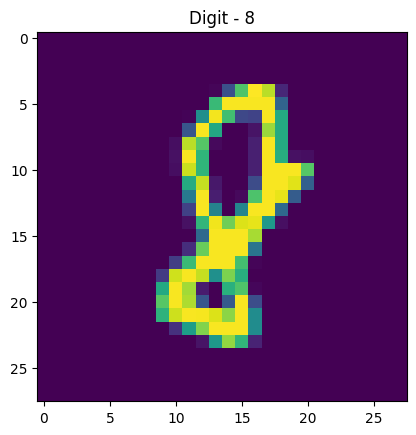

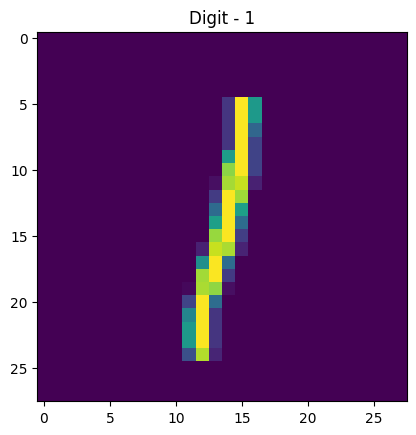

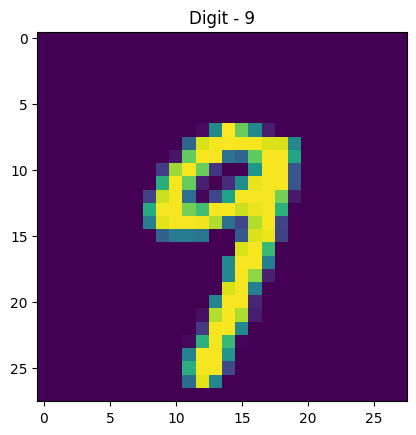

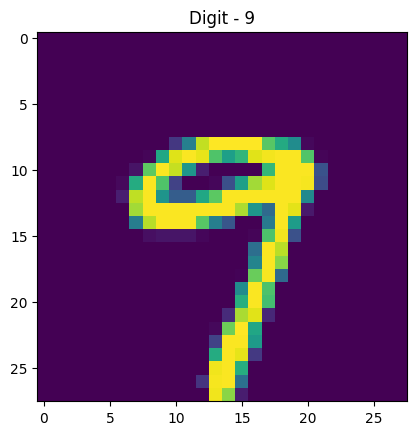

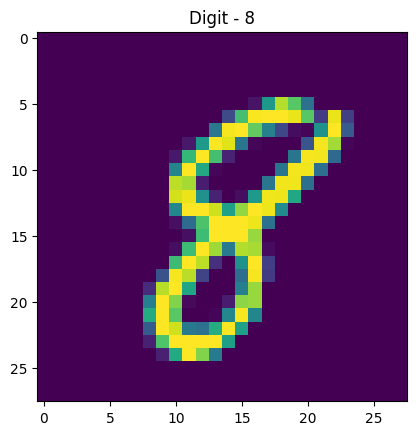

In [119]:
for i in range(len(pred)):
    plt.imshow(X_test[i].reshape(28,28))
    plt.title(f'Digit - {pred[i]}')
    plt.show()

In [120]:
df_eval = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [121]:
df_eval.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [122]:
X_eval = df_eval.to_numpy()

In [123]:
X_eval[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,  10,  17,  17,  17,  17,  81, 180, 180,
        35,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0, 139, 253, 253, 253, 253, 253,
       253, 253,  48,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,  60, 228, 253, 25

In [124]:
eval_pred = np.argmax(model.predict(normalize_data(X_eval).reshape(-1, 28, 28)), axis=1)

875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


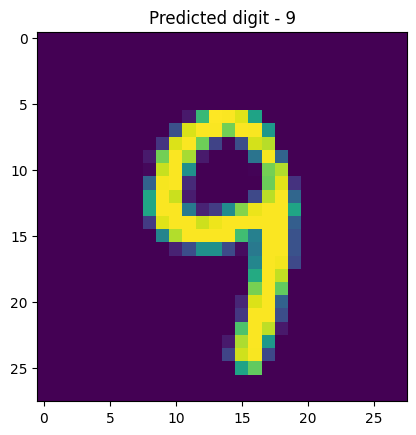

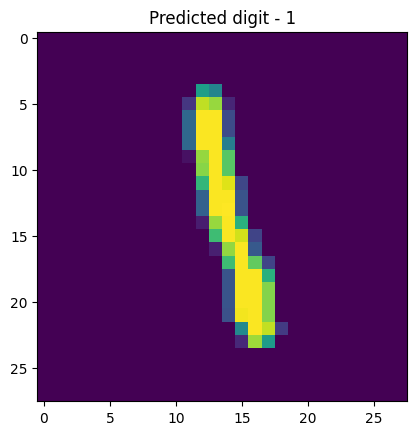

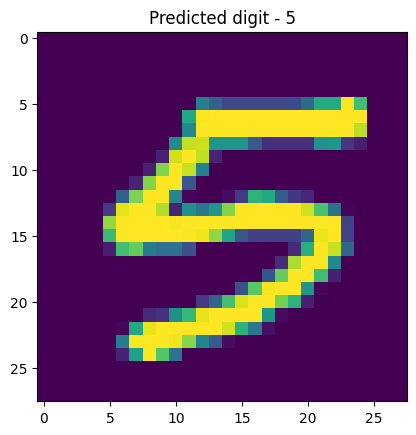

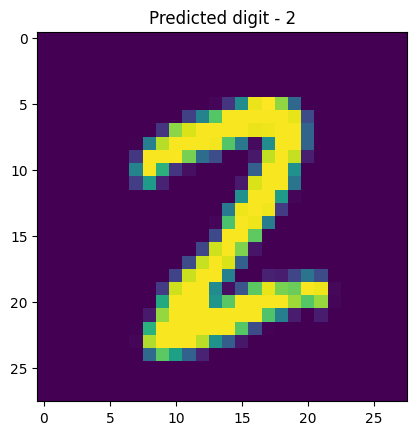

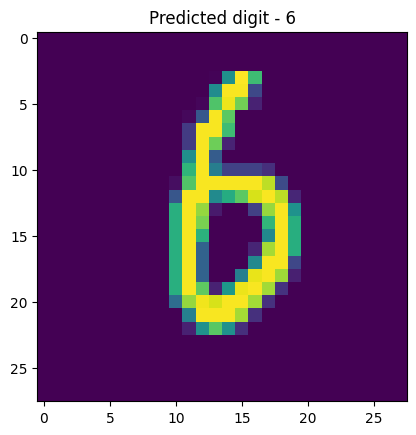

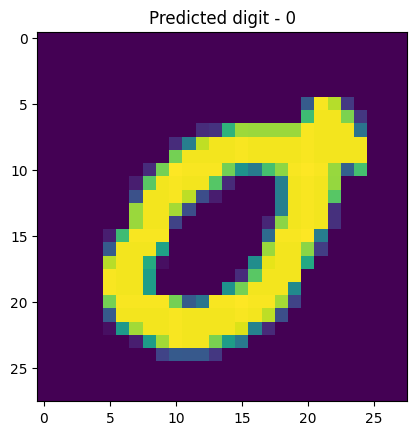

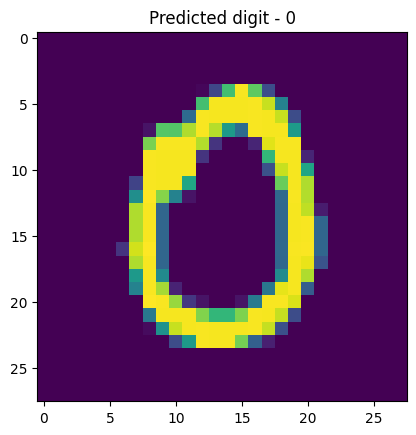

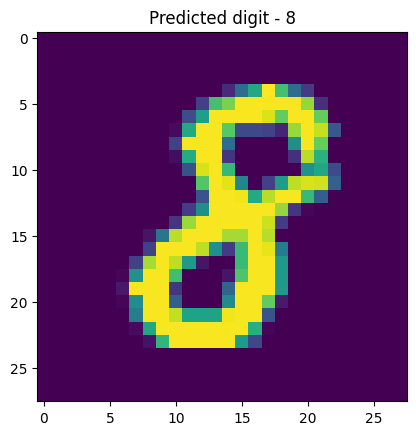

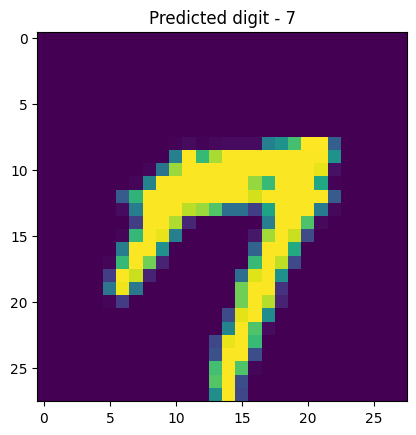

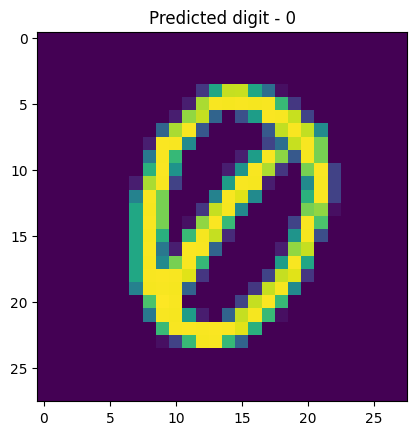

In [125]:
samples = np.random.randint(0, len(X_eval), 10)
for s in samples:
    plt.imshow(X_eval[s].reshape(28, 28))
    plt.title(f'Predicted digit - {eval_pred[s]}')
    plt.show()
    

In [126]:
df_res = pd.DataFrame({'ImageId': list(range(1, len(eval_pred) + 1)), 'Label': eval_pred})

In [127]:
df_res.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,2
4,5,3


In [128]:
df_res.set_index('ImageId', inplace=True)

In [129]:
df_res.to_csv('/kaggle/working/submission.csv')